In [231]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [238]:
class ThompsonSampling:
    def __init__(self, k, random_state=42):
        np.random.seed(random_state)
        self.k = k
        self.q_true = np.random.normal(0, 1, k) # True mean rewards for each arm
        self.alpha = np.ones(k) # number of successes
        self.beta = np.ones(k) # number of failures
        self.selection_counts = np.zeros(k)  # Track arm selection counts

        self.alpha_history = [[] for _ in range(k)]  # Store α evolution
        self.beta_history = [[] for _ in range(k)]  # Store β evolution

    def select_action(self):
        samples = np.random.beta(self.alpha, self.beta) # Sample from Beta(α, β)
        chosen_arm  = np.argmax(samples)
        self.selection_counts[chosen_arm] += 1  # Track selection
        return chosen_arm  # Choose arm with highest sample

    def pull(self, arm_id):
        """Simulates a Bernoulli reward (1 for success, 0 for failure)."""
        success_prob = 1 / (1 + np.exp(-self.q_true[arm_id]))  # Convert to probability
        return 1 if np.random.rand() < success_prob else 0

    def update(self, arm_id, reward):
        if reward > 0:
            self.alpha[arm_id] += 1
        else:
            self.beta[arm_id] += 1

        # Track history of α and β
        for i in range(self.k):
            self.alpha_history[i].append(self.alpha[i])
            self.beta_history[i].append(self.beta[i])
        
        

In [239]:
ts = ThompsonSampling(5)
ts.q_true

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337])

In [258]:
ts = ThompsonSampling(5)
print(f"true: {ts.q_true}\n")



for i in range(1000):
    arm_id = ts.select_action()
    reward = ts.pull(arm_id)
    ts.update(arm_id, reward)


    print(f"alpha={ts.alpha}")
    print(f"beta={ts.beta}")
    print(f"arm_id={arm_id}")
    print()


true: [ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337]

alpha=[1. 1. 1. 1. 1.]
beta=[1. 1. 1. 1. 2.]
arm_id=4

alpha=[1. 1. 1. 1. 1.]
beta=[1. 1. 2. 1. 2.]
arm_id=2

alpha=[1. 1. 1. 1. 1.]
beta=[2. 1. 2. 1. 2.]
arm_id=0

alpha=[1. 1. 1. 1. 1.]
beta=[2. 2. 2. 1. 2.]
arm_id=1

alpha=[1. 1. 1. 1. 2.]
beta=[2. 2. 2. 1. 2.]
arm_id=4

alpha=[1. 1. 1. 2. 2.]
beta=[2. 2. 2. 1. 2.]
arm_id=3

alpha=[1. 1. 1. 3. 2.]
beta=[2. 2. 2. 1. 2.]
arm_id=3

alpha=[1. 1. 1. 3. 2.]
beta=[2. 2. 2. 1. 3.]
arm_id=4

alpha=[1. 1. 1. 4. 2.]
beta=[2. 2. 2. 1. 3.]
arm_id=3

alpha=[1. 1. 1. 5. 2.]
beta=[2. 2. 2. 1. 3.]
arm_id=3

alpha=[1. 1. 1. 5. 2.]
beta=[2. 2. 2. 2. 3.]
arm_id=3

alpha=[1. 2. 1. 5. 2.]
beta=[2. 2. 2. 2. 3.]
arm_id=1

alpha=[1. 3. 1. 5. 2.]
beta=[2. 2. 2. 2. 3.]
arm_id=1

alpha=[1. 3. 1. 6. 2.]
beta=[2. 2. 2. 2. 3.]
arm_id=3

alpha=[1. 3. 1. 7. 2.]
beta=[2. 2. 2. 2. 3.]
arm_id=3

alpha=[1. 3. 1. 7. 2.]
beta=[2. 3. 2. 2. 3.]
arm_id=1

alpha=[1. 3. 1. 8. 2.]
beta=[2. 3. 2. 2. 3.]
arm_id

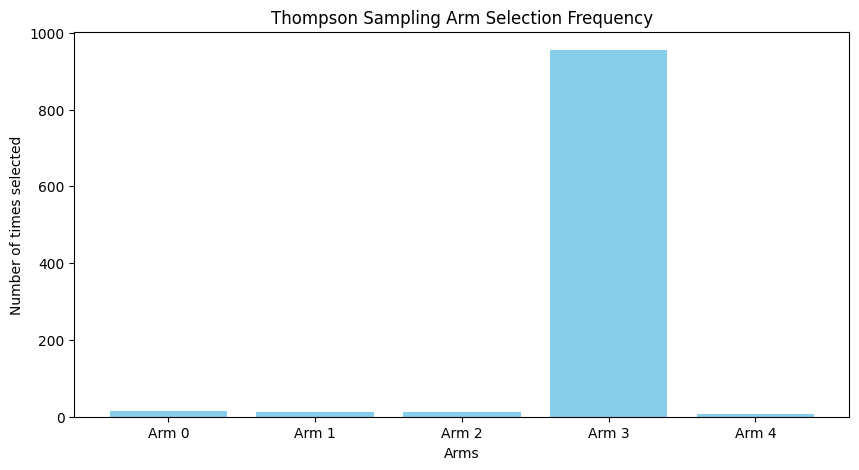

In [259]:
# Plot the number of times each arm was selected
plt.figure(figsize=(10, 5))
plt.bar(range(ts.k), ts.selection_counts, tick_label=[f"Arm {i}" for i in range(ts.k)], color="skyblue")
plt.xlabel("Arms")
plt.ylabel("Number of times selected")
plt.title("Thompson Sampling Arm Selection Frequency")
plt.show()

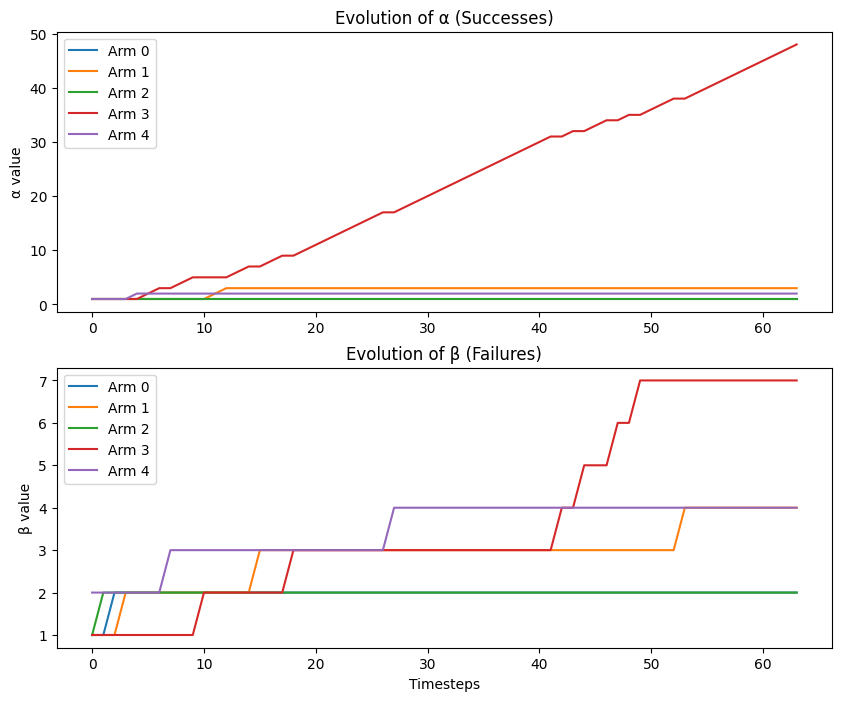

In [263]:
lim = 64

# Plot the evolution of α and β
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

for i in range(ts.k):
    axes[0].plot(ts.alpha_history[i][:lim], label=f"Arm {i}")
    axes[1].plot(ts.beta_history[i][:lim], label=f"Arm {i}")

axes[0].set_title("Evolution of α (Successes)")
axes[1].set_title("Evolution of β (Failures)")
axes[0].set_ylabel("α value")
axes[1].set_ylabel("β value")
axes[1].set_xlabel("Timesteps")

axes[0].legend()
axes[1].legend()
# axes[0].set_xscale('log')
# axes[1].set_xscale('log')
plt.show()